In [8]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import glob
import os
from tqdm import tqdm
from scipy import stats
import networkx as nx
import seaborn as sns
import re
import sys
sys.path.append("../scripts/")
from ner_eval_all_experiments import *

plt.style.use("../config/custom_plt.mplstyle")

plt.rc('text', usetex=False)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [45]:
%%time

import json

with open('../cka_results_fixed_29_11_25.json', 'r') as f:
    data = json.load(f)

CPU times: user 1.81 ms, sys: 1.02 ms, total: 2.83 ms
Wall time: 2.5 ms


In [46]:
layers = ['pos_enc', 'ffn0_lin1', 'ffn0_lin2', 'ffn5_lin1', 'ffn5_lin2', 'classifier']

layer_names = {
    'pos_enc': 'Positional Encoding', 
    'ffn0_lin1': 'L1 First Transformer Block', 
    'ffn0_lin2': 'L2 First Transformer Block', 
    'ffn5_lin1': 'L1 Last Transformer Block', 
    'ffn5_lin2': 'L2 Last Transformer Block', 
    'classifier': 'Classifier'
}

layer_colors = ['#2D708E','#EDA15F','#7E5A9B','#4D4D4D','#00A9CE','#D1495B']

In [70]:
# data['classifier']['threshold']

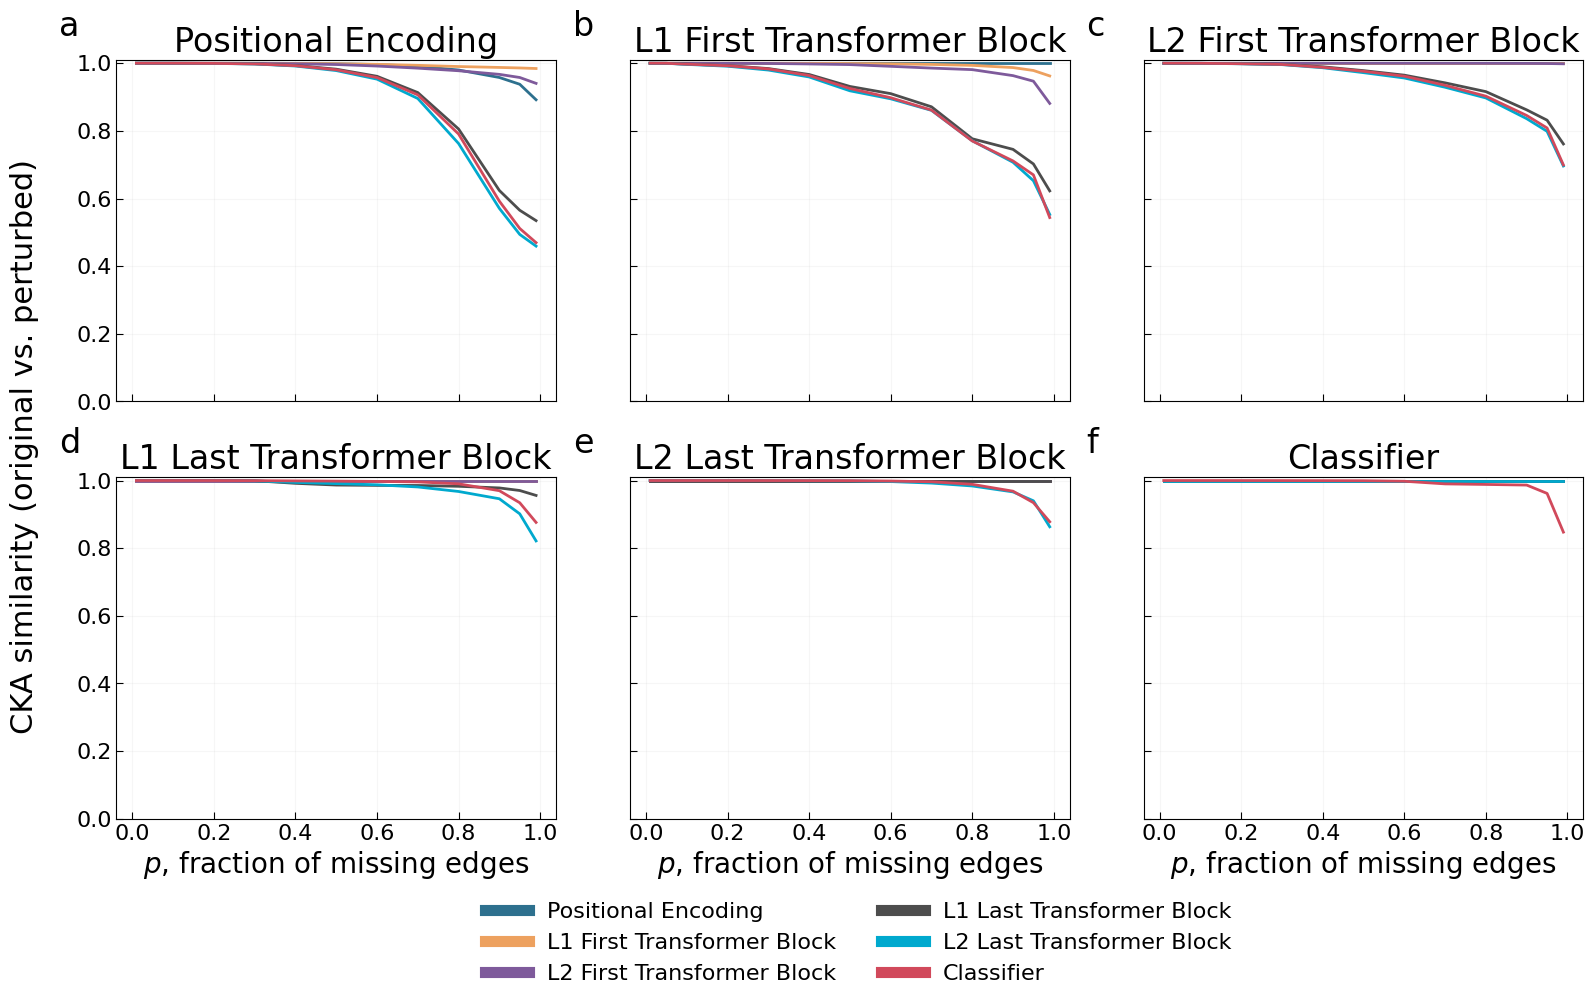

In [78]:
fig, axes = plt.subplots(2, 3, figsize=(16, 9), sharey=True, sharex=True)

axes = axes.flatten()

for i, l in enumerate(layers):
    frac = [1-x['frac'] for x in data[l]['threshold']]
    
    for j, r in enumerate(layers):
        cka_r = [x['cka'][r] for x in data[l]['threshold']]
        axes[i].plot(frac, cka_r, color=layer_colors[j])
    
    axes[i].set_title(layer_names[l])

axes[0].set_ylim(0, 1.01)


fig.supylabel('CKA similarity (original vs. perturbed)', fontsize=22, x=0)
axes[3].set_xlabel('$p$, fraction of missing edges')
axes[4].set_xlabel('$p$, fraction of missing edges')
axes[5].set_xlabel('$p$, fraction of missing edges')


fig.legend(
    handles=[plt.Line2D([0], [0], color=c, lw=8) for c in layer_colors],
    labels=layer_names.values(),
    loc='lower center',
    bbox_to_anchor=(0.53, -0.12),
    ncol=2,
    frameon=False
)

subplot_labels = list('abcdef')
for ax, label in zip(axes.flatten(), subplot_labels):
    ax.text(
        -0.13, 1.05, label,            # position: just above top-left of each subplot
        transform=ax.transAxes,         # use axes-relative coordinates
        fontsize=24,
        fontweight='normal',
        va='bottom',
        ha='left'
    )

plt.tight_layout()


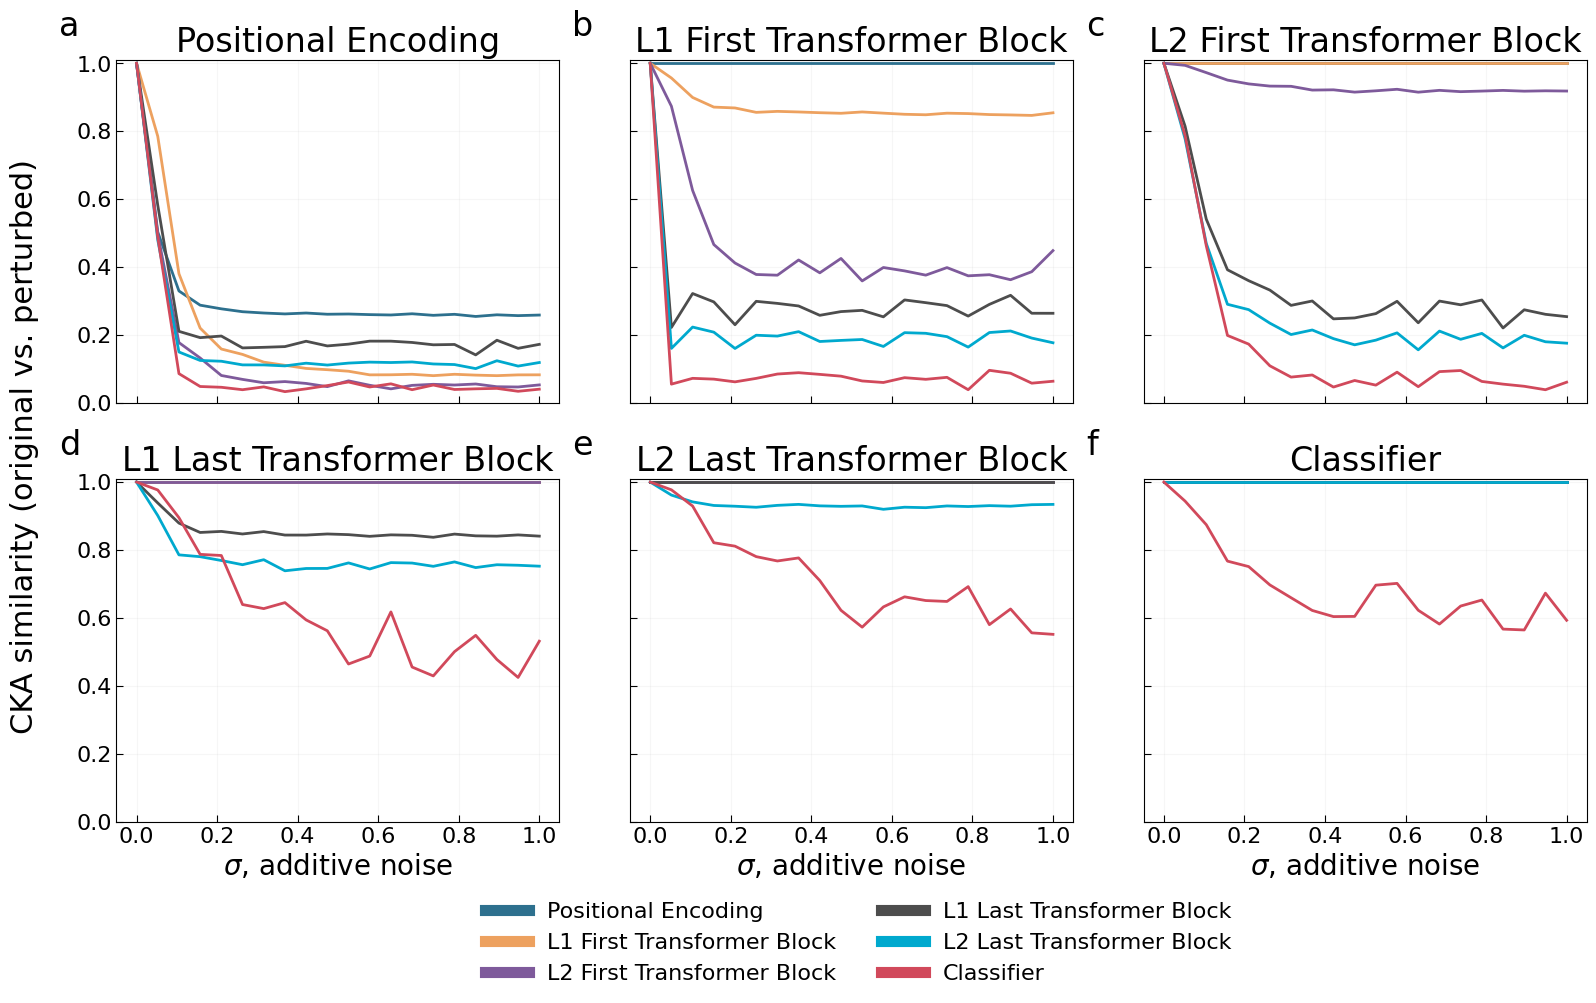

In [79]:
fig, axes = plt.subplots(2, 3, figsize=(16, 9), sharey=True, sharex=True)

axes = axes.flatten()

for i, l in enumerate(layers):
    frac = [x['sigma'] for x in data[l]['noise']]
    
    for j, r in enumerate(layers):
        cka_r = [x['cka'][r] for x in data[l]['noise']]
        axes[i].plot(frac, cka_r, color=layer_colors[j])
    
    axes[i].set_title(layer_names[l])
    #axes[i].set_xscale('log')

axes[0].set_ylim(0, 1.01)


fig.legend(
    handles=[plt.Line2D([0], [0], color=c, lw=8) for c in layer_colors],
    labels=layer_names.values(),
    loc='lower center',
    bbox_to_anchor=(0.53, -0.12),
    ncol=2,
    frameon=False
)

fig.supylabel('CKA similarity (original vs. perturbed)', fontsize=22, x=0)
axes[3].set_xlabel(r'$\sigma$, additive noise')
axes[4].set_xlabel(r'$\sigma$, additive noise')
axes[5].set_xlabel(r'$\sigma$, additive noise')


subplot_labels = list('abcdef')
for ax, label in zip(axes.flatten(), subplot_labels):
    ax.text(
        -0.13, 1.05, label,            # position: just above top-left of each subplot
        transform=ax.transAxes,         # use axes-relative coordinates
        fontsize=24,
        fontweight='normal',
        va='bottom',
        ha='left'
    )
    
plt.tight_layout()

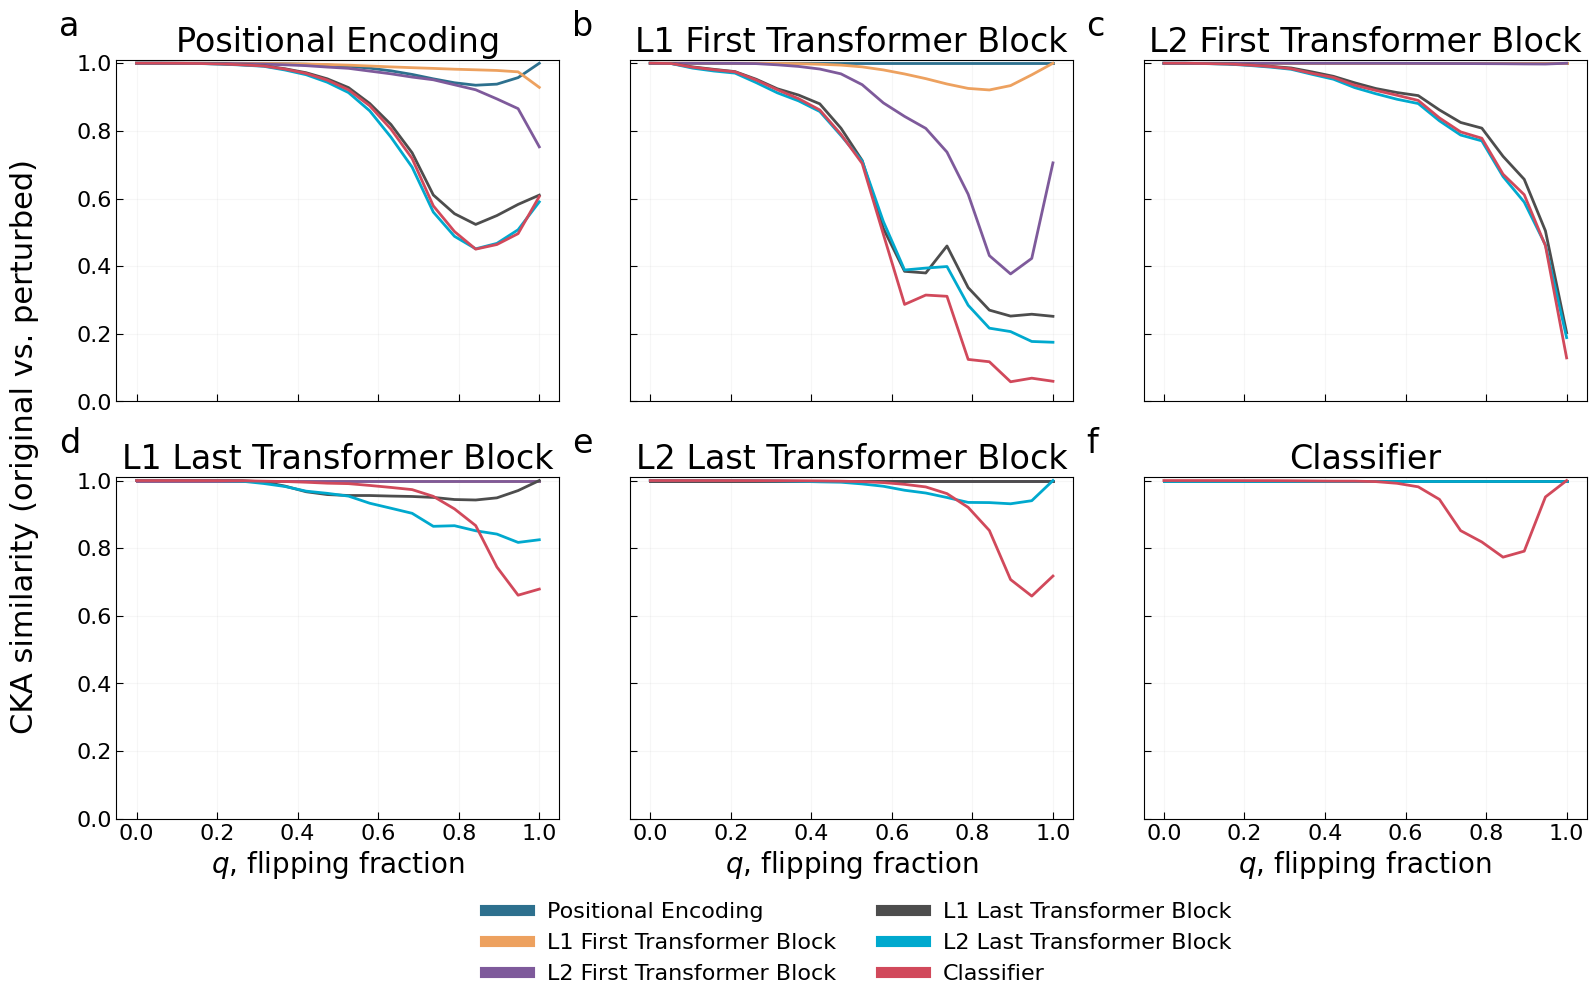

In [80]:
fig, axes = plt.subplots(2, 3, figsize=(16, 9), sharey=True, sharex=True)

axes = axes.flatten()

for i, l in enumerate(layers):
    frac = [x['q'] for x in data[l]['flip']]
    
    for j, r in enumerate(layers):
        cka_r = [x['cka'][r] for x in data[l]['flip']]
        axes[i].plot(frac, cka_r, color=layer_colors[j])
    
    axes[i].set_title(layer_names[l])

axes[0].set_ylim(0, 1.01)

fig.legend(
    handles=[plt.Line2D([0], [0], color=c, lw=8) for c in layer_colors],
    labels=layer_names.values(),
    loc='lower center',
    bbox_to_anchor=(0.53, -0.12),
    ncol=2,
    frameon=False
)

fig.supylabel('CKA similarity (original vs. perturbed)', fontsize=22, x=0)
axes[3].set_xlabel('$q$, flipping fraction')
axes[4].set_xlabel('$q$, flipping fraction')
axes[5].set_xlabel('$q$, flipping fraction')


subplot_labels = list('abcdef')
for ax, label in zip(axes.flatten(), subplot_labels):
    ax.text(
        -0.13, 1.05, label,            # position: just above top-left of each subplot
        transform=ax.transAxes,         # use axes-relative coordinates
        fontsize=24,
        fontweight='normal',
        va='bottom',
        ha='left'
    )

plt.tight_layout()

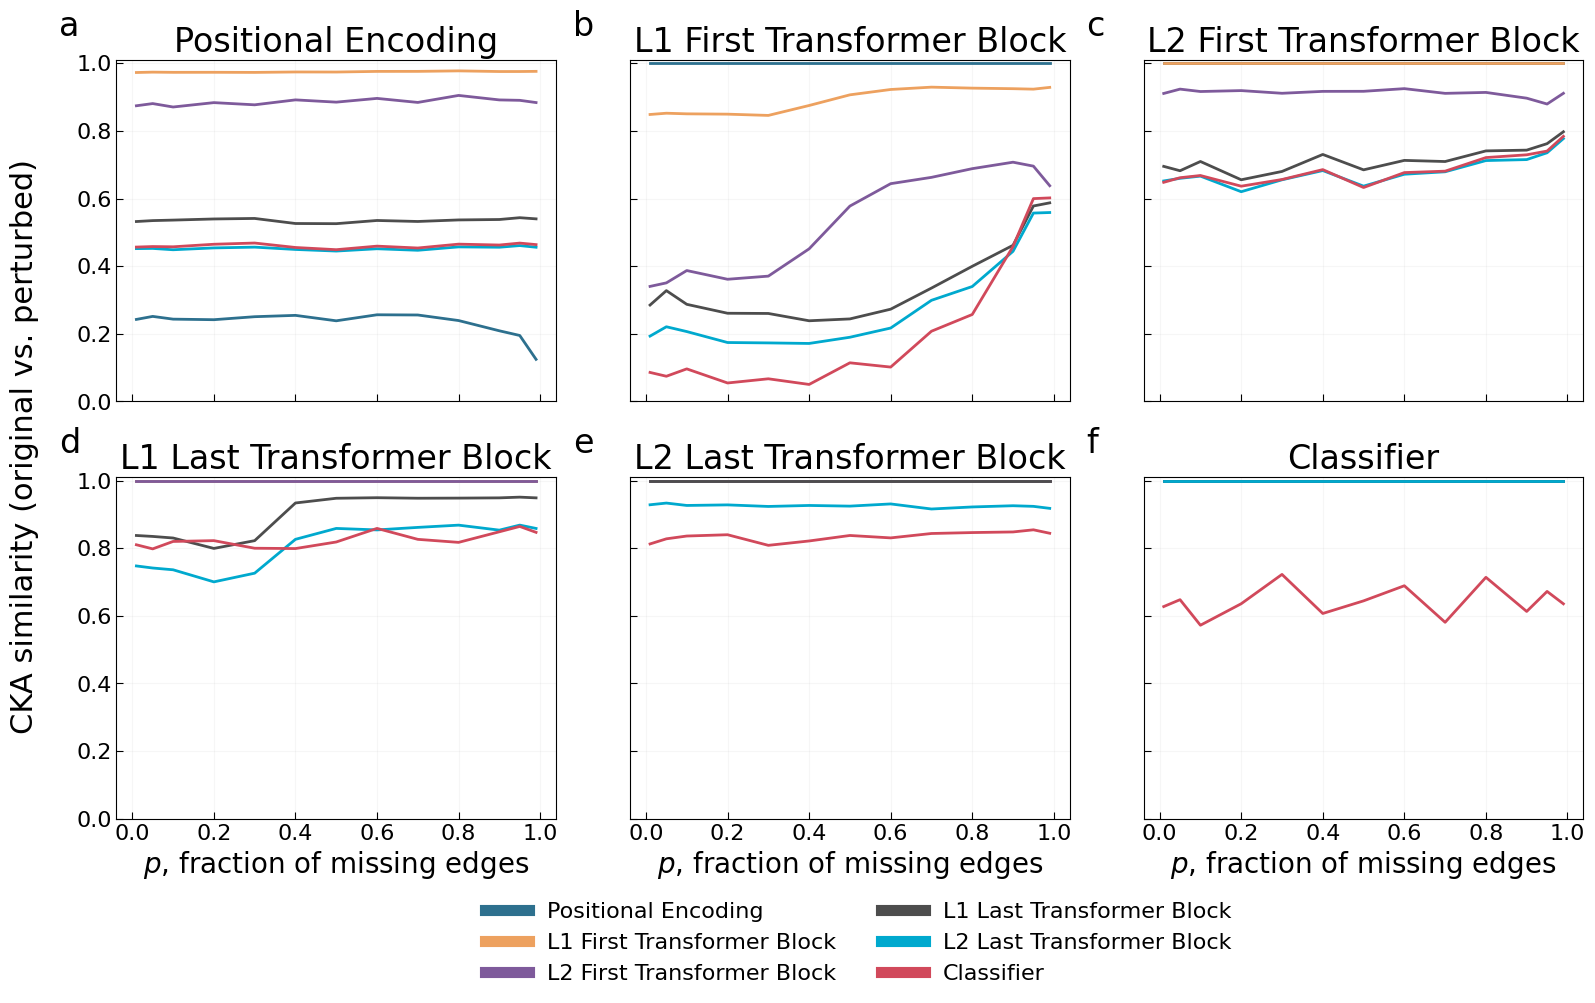

In [81]:
fig, axes = plt.subplots(2, 3, figsize=(16, 9), sharey=True, sharex=True)

axes = axes.flatten()

for i, l in enumerate(layers):
    frac = [1-x['frac'] for x in data[l]['threshold']]
    
    for j, r in enumerate(layers):
        cka_r = [x['cka_shuffle_random'][r] for x in data[l]['threshold']]
        axes[i].plot(frac, cka_r, color=layer_colors[j])
    
    axes[i].set_title(layer_names[l])

fig.supylabel('CKA similarity (original vs. perturbed)', fontsize=22, x=0)
axes[3].set_xlabel('$p$, fraction of missing edges')
axes[4].set_xlabel('$p$, fraction of missing edges')
axes[5].set_xlabel('$p$, fraction of missing edges')

axes[0].set_ylim(0, 1.01)

fig.legend(
    handles=[plt.Line2D([0], [0], color=c, lw=8) for c in layer_colors],
    labels=layer_names.values(),
    loc='lower center',
    bbox_to_anchor=(0.53, -0.12),
    ncol=2,
    frameon=False
)

subplot_labels = list('abcdef')
for ax, label in zip(axes.flatten(), subplot_labels):
    ax.text(
        -0.13, 1.05, label,            # position: just above top-left of each subplot
        transform=ax.transAxes,         # use axes-relative coordinates
        fontsize=24,
        fontweight='normal',
        va='bottom',
        ha='left'
    )

plt.tight_layout()


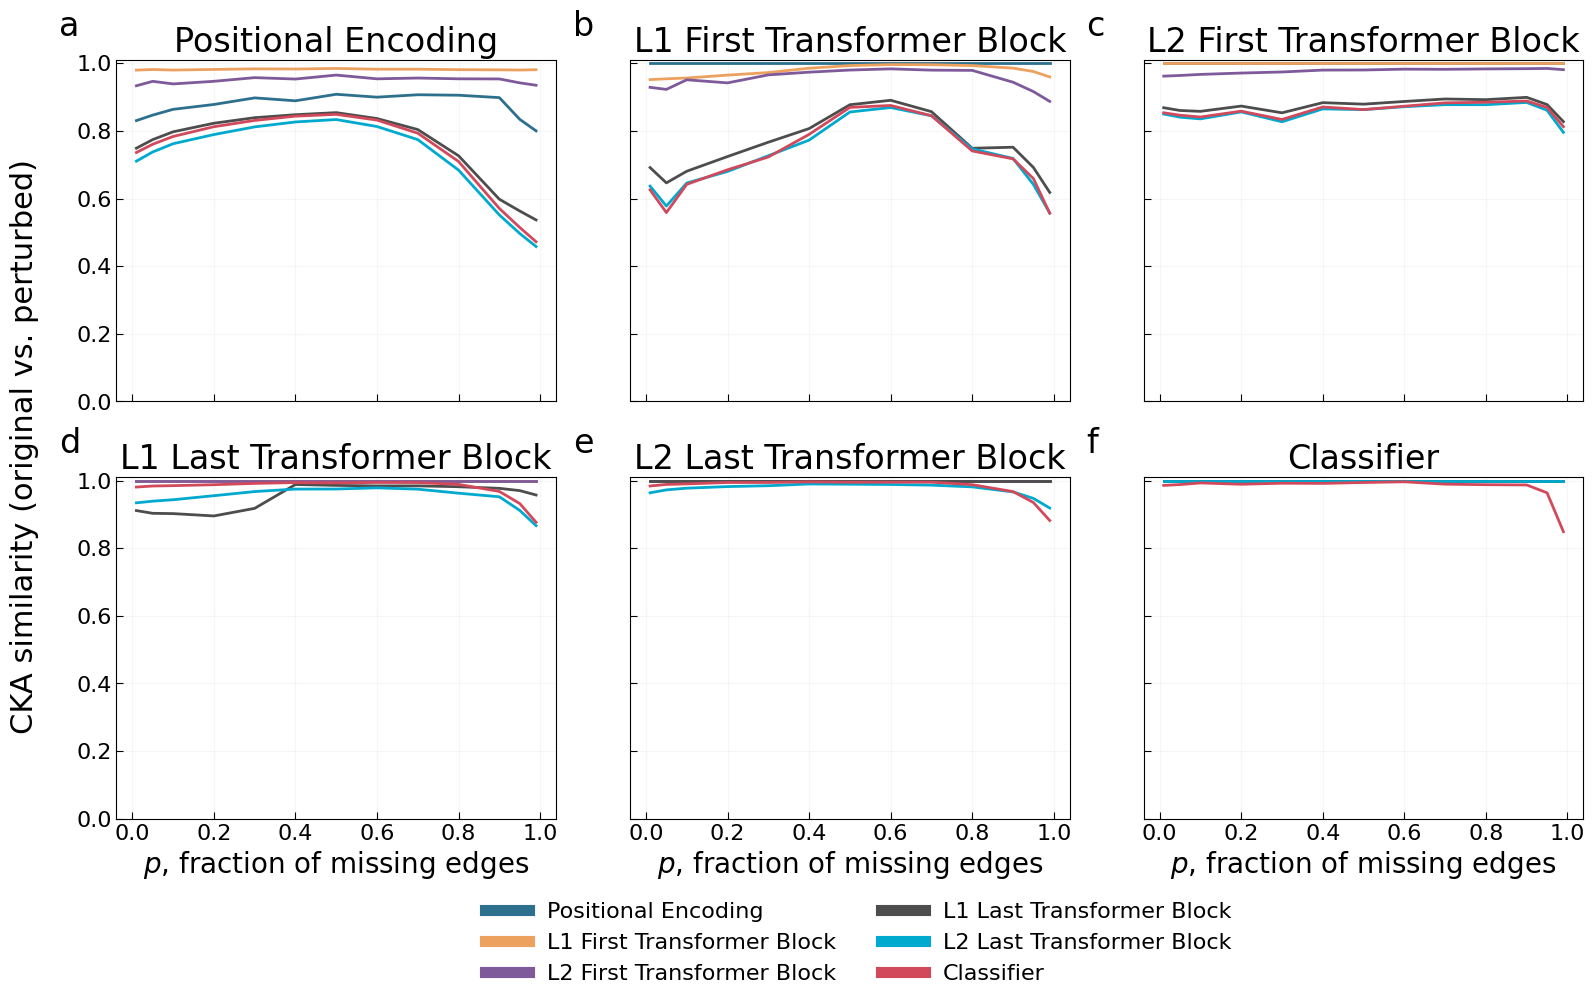

In [82]:
fig, axes = plt.subplots(2, 3, figsize=(16, 9), sharey=True, sharex=True)

axes = axes.flatten()

for i, l in enumerate(layers):
    frac = [1-x['frac'] for x in data[l]['threshold']]
    
    for j, r in enumerate(layers):
        cka_r = [x['cka_shuffle_random_pos_neg'][r] for x in data[l]['threshold']]
        axes[i].plot(frac, cka_r, color=layer_colors[j])
    
    axes[i].set_title(layer_names[l])

fig.supylabel('CKA similarity (original vs. perturbed)', fontsize=22, x=0)
axes[3].set_xlabel('$p$, fraction of missing edges')
axes[4].set_xlabel('$p$, fraction of missing edges')
axes[5].set_xlabel('$p$, fraction of missing edges')

axes[0].set_ylim(0, 1.01)

fig.legend(
    handles=[plt.Line2D([0], [0], color=c, lw=8) for c in layer_colors],
    labels=layer_names.values(),
    loc='lower center',
    bbox_to_anchor=(0.53, -0.12),
    ncol=2,
    frameon=False
)

subplot_labels = list('abcdef')
for ax, label in zip(axes.flatten(), subplot_labels):
    ax.text(
        -0.13, 1.05, label,            # position: just above top-left of each subplot
        transform=ax.transAxes,         # use axes-relative coordinates
        fontsize=24,
        fontweight='normal',
        va='bottom',
        ha='left'
    )

plt.tight_layout()
